In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
x,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [5]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.1 MB 1.6 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.7 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.6 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.6 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 1.9 MB/s eta 0:00:03
   ----------------------- ---------------- 4.7/8.1 MB 2.1 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 2.1 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


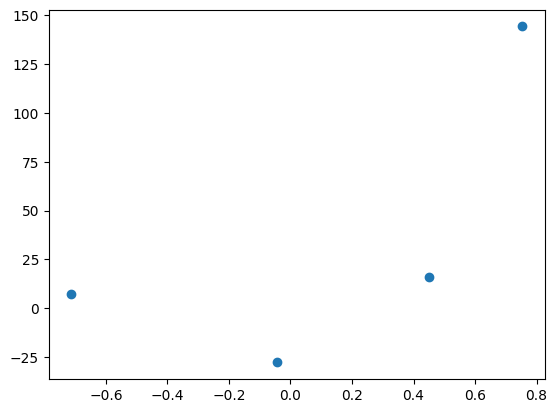

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [8]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
reg.coef_

array([78.35063668])

In [13]:
reg.intercept_

26.15963284313262

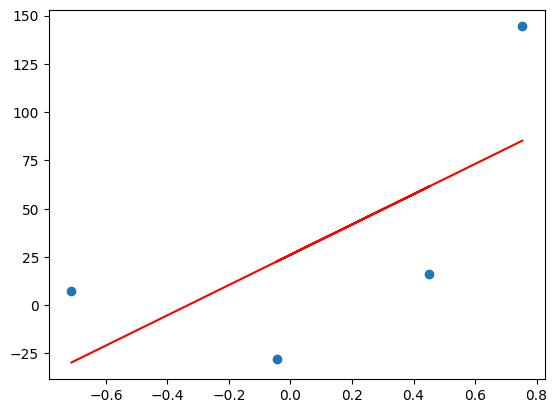

In [14]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [15]:
# Lets apply Gredient Descent assuming slope is constant m=78.35
# and let's assume the starting value for intercept b=0
y_pred=((78.53*x)+0).reshape(4)

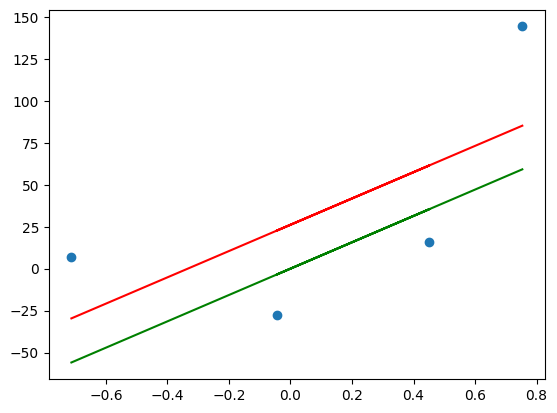

In [16]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='b=0')

In [17]:
m=78.35
b=0
loss_slope = -2 * np.sum(y-m*x.ravel()-b)
loss_slope

-209.27763408209216

In [25]:
#lets take learning rate =0.1
lr=0.1
step_size=loss_slope*lr
step_size

-20.927763408209216

In [28]:
# calculate the new intercept
b = b-step_size
b

83.71105363283687

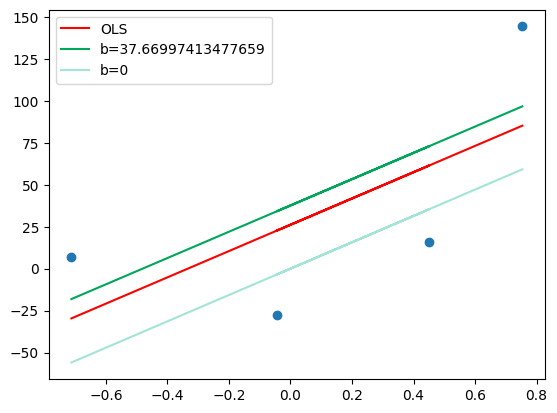

In [34]:
y_pred1=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

In [29]:
# iteration 2
loss_slope =-2 *np.sum(y-m*x.ravel() - b)
loss_slope

460.41079498060276

In [32]:
step_size = loss_slope*lr
step_size

46.04107949806028

In [33]:
b =b-step_size
b

37.66997413477659

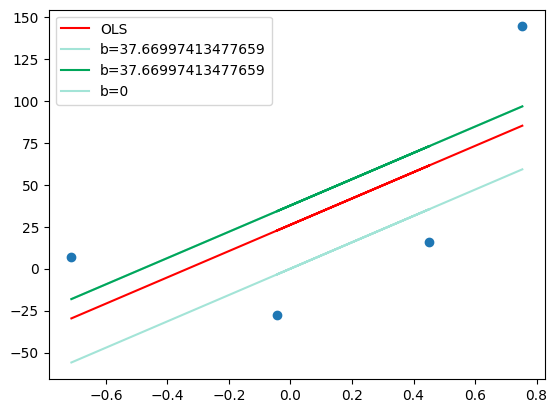

In [36]:
 y_pred2=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#A3E4D7',label='b={}'.format(b))
plt.plot(x,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

In [37]:
# Iteration 3
loss_slope =-2 *np.sum(y-m*x.ravel() - b)
loss_slope

92.08215899612053

In [38]:
step_size = loss_slope*lr
step_size

9.208215899612053

In [39]:
b =b-step_size
b

28.461758235164535

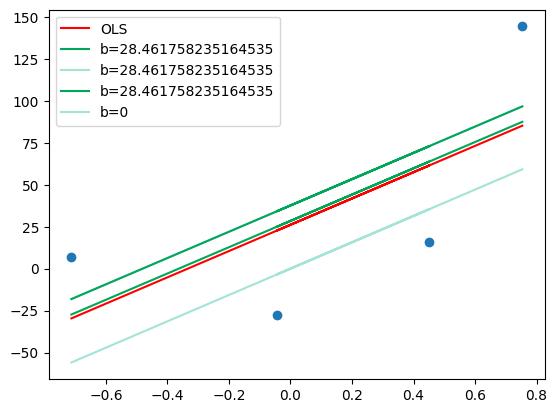

In [41]:
y_pred3=((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b={}'.format(b))
plt.plot(x,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

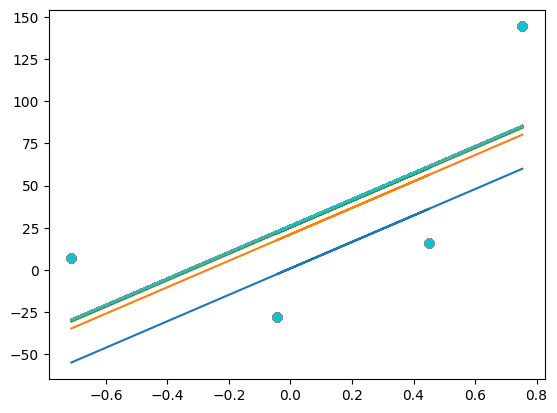

In [44]:
# through loop
b=-100
lr=0.1

epochs = 100

for i in range(epochs):
    loss_slope= -2*np.sum(y-m*x.ravel()-b)
    b= b-(lr*loss_slope)

    y_pred=m*x+b
    plt.plot(x,y_pred)
    plt.scatter(x,y)